In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
data = pd.read_csv('data/yc_essential_data.csv')

In [103]:
data.head()

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,...,batch,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID
0,370,Wufoo,wufoo,[],https://bookface-images.s3.amazonaws.com/small...,http://wufoo.com,"Tampa, FL, USA",Wufoo is a web application that helps anybody ...,Online form builder.,11.0,...,W06,Acquired,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,370
1,369,Project Wedding,project-wedding,[],/company/thumb/missing.png,http://projectwedding.com,"Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",NaN,2.0,...,W06,Acquired,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,369
2,367,Clustrix,clustrix,[],https://bookface-images.s3.amazonaws.com/small...,http://clustrix.com,"San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,NaN,51.0,...,W06,Acquired,"[""B2B"", ""Infrastructure""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,367
3,366,Inkling,inkling,[],/company/thumb/missing.png,http://inklingmarkets.com,"Chicago, IL, USA","Inkling, based in Chicago, Illinois, offers co...",NaN,11.0,...,W06,Acquired,"[""B2B"", ""Finance and Accounting""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,366
4,372,Audiobeta,audiobeta,[],/company/thumb/missing.png,http://audiobeta.com,"Somerville, MA, USA",AudioBeta develops web-based applications that...,NaN,0.0,...,W06,Inactive,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,372


In [104]:
data = data[data.batch != 'Unspecified']

In [105]:
def get_season(batch: str):
    season = batch[0]
    year = "20" + batch[1:]
    return season

def get_year(batch: str):
    if batch.startswith("IK"):
        year = "20" + batch[2:]
    else:
        year = "20" + batch[1:]
    return year

In [106]:
data['year'] = data['batch'].apply(get_year)

In [57]:
data.head()

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,...,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID,year
0,370,Wufoo,wufoo,[],https://bookface-images.s3.amazonaws.com/small...,http://wufoo.com,"Tampa, FL, USA",Wufoo is a web application that helps anybody ...,Online form builder.,11.0,...,Acquired,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,370,2006
1,369,Project Wedding,project-wedding,[],/company/thumb/missing.png,http://projectwedding.com,"Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",NaN,2.0,...,Acquired,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,369,2006
2,367,Clustrix,clustrix,[],https://bookface-images.s3.amazonaws.com/small...,http://clustrix.com,"San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,NaN,51.0,...,Acquired,"[""B2B"", ""Infrastructure""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,367,2006
3,366,Inkling,inkling,[],/company/thumb/missing.png,http://inklingmarkets.com,"Chicago, IL, USA","Inkling, based in Chicago, Illinois, offers co...",NaN,11.0,...,Acquired,"[""B2B"", ""Finance and Accounting""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,366,2006
4,372,Audiobeta,audiobeta,[],/company/thumb/missing.png,http://audiobeta.com,"Somerville, MA, USA",AudioBeta develops web-based applications that...,NaN,0.0,...,Inactive,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,372,2006


In [136]:
df = data[['long_description', 'year']]

In [137]:
df = df.dropna()

In [138]:
df['len_descr'] = df.long_description.apply(len)

In [139]:
df = df.sort_values(by=['year'])

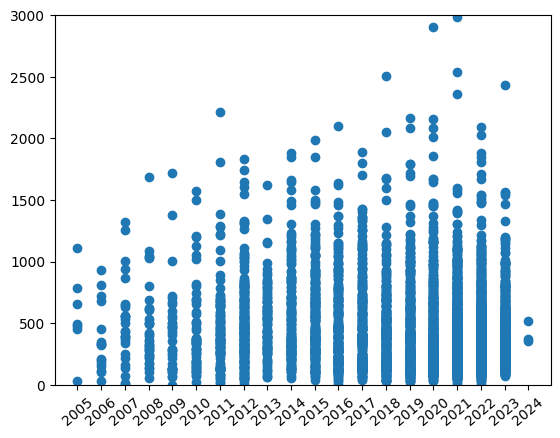

In [126]:
plt.scatter(df['year'], df['len_descr'])
plt.ylim(0, 3000)
plt.xticks(rotation=40);

In [140]:
df

,long_description,year,len_descr
3490,What is Infogami?\n\nThe art of transforming d...,2005,659
3485,Founded by Steve Huffman and Alexis Ohanian in...,2005,457
3486,Kiko is a web calendar for anyone who wants to...,2005,493
3487,ClickFacts is a Malware Software Solutions com...,2005,787
3488,"Founded in 2005, TextPayMe is an SMS payment s...",2005,1110
...,...,...,...
2548,Fastgen is a low-code API and workflow builder...,2023,284
1891,Continue is an IDE extension that brings the p...,2023,169
3495,AgentHub is a platform for automating repetiti...,2024,354
3494,Leya is an AI assistant designed for legal pro...,2024,369


In [142]:
mean_len_df = df.groupby("year").mean(numeric_only=True)

In [149]:
mean_len_df.reset_index(inplace=True)

In [150]:
mean_len_df

,year,len_descr
0,2005,573.000000
1,2006,371.000000
2,2007,505.555556
3,2008,473.444444
4,2009,418.567568
5,2010,451.122807
6,2011,473.550000
7,2012,515.832512
8,2013,523.161290
9,2014,569.418919


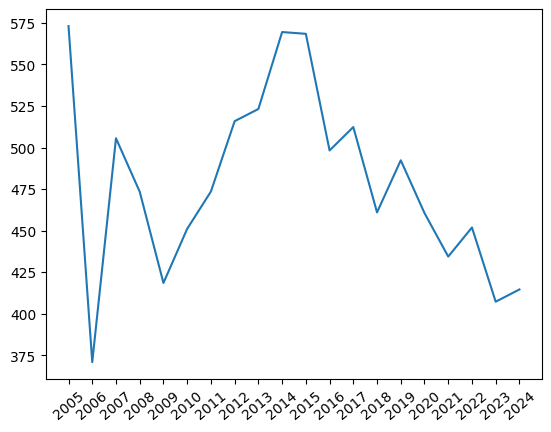

In [147]:
plt.plot(mean_len_df.index, mean_len_df['len_descr'])
plt.xticks(rotation=40);

In [148]:
import seaborn as sns

(0.0, 2500.0)

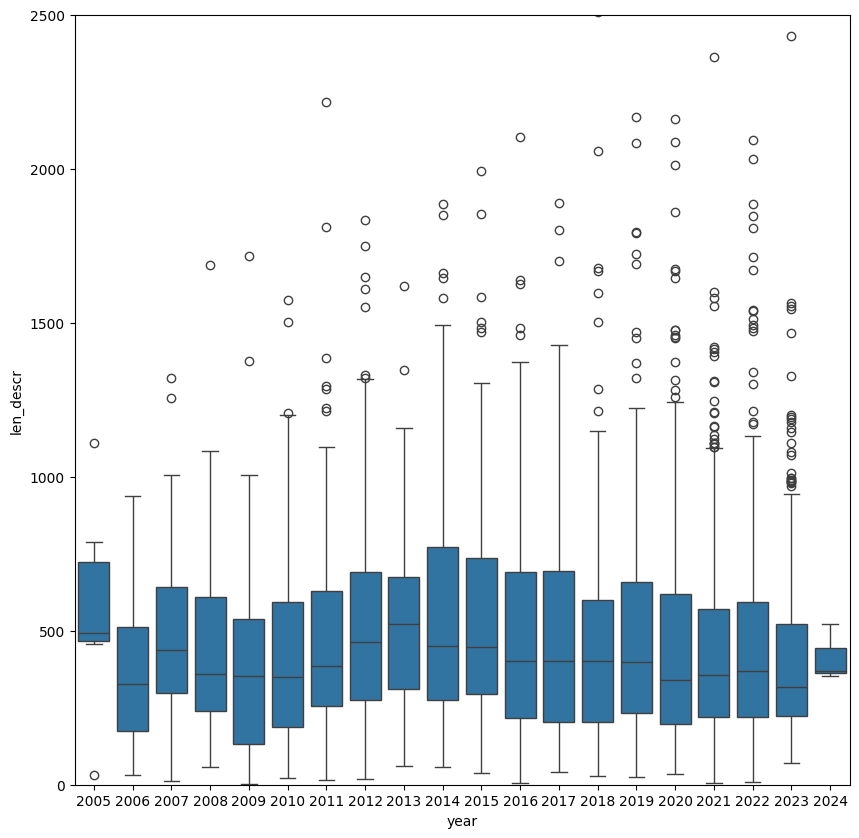

In [160]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="year", y="len_descr", fill=True)
plt.ylim(0, 2500)